<a href="https://colab.research.google.com/github/hijera/NN_colab_hw/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%C2%AB%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8_%D0%B4%D0%B5%D1%82%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2%C2%BB_(%D0%92%D0%BB%D0%B0%D1%81%D0%BE%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [ ]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [ ]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [ ]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

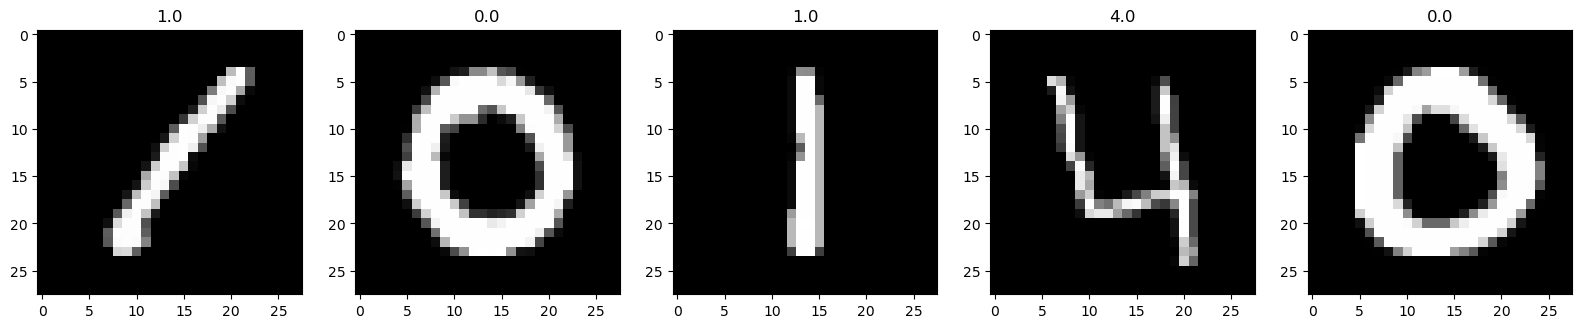

In [ ]:
fig = plt.figure(figsize=(28, 28))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [ ]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (14,14)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

In [ ]:

train_hist = np.zeros((len(train_img), 144))
for i in range(len(train_img)):
    descriptor = hog.compute(np.uint8(train_img[i]))
    train_hist[i] = descriptor

test_hist = np.zeros((len(test_img), 144))
for i in range(len(test_img)):
    descriptor = hog.compute(np.uint8(test_img[i]))
    test_hist[i] = descriptor



#descriptor = hog.compute(np.uint8(train_img[1]))
#print('Descriptor size: %d' % len(descriptor))



## Разбиваем выборку на обучение и валидацию

In [ ]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2,
    random_state=42)

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

model = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=4,max_iter=1000)
)


model.fit(x_train, y_train)
print(model.score(x_val,y_val))
pred_val=model.predict(x_val)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9655952380952381


## Оцениваем качество решение на валидационной выборке

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.9655952380952381


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       816
         1.0       0.99      0.98      0.99       909
         2.0       0.99      0.95      0.97       846
         3.0       0.98      0.96      0.97       937
         4.0       0.99      0.96      0.97       839
         5.0       0.99      0.96      0.97       702
         6.0       0.99      0.98      0.98       785
         7.0       0.98      0.94      0.96       893
         8.0       0.85      0.98      0.91       835
         9.0       0.93      0.96      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[801   0   1   2   0   0   3   0   8   1]
 [  0 895   0   1   0   0   2   1   9   1]
 [  3   1 802   7   0   0   0   1  31   1]
 [  1   0   2 899   2   3   0   3  26   1]
 [  0   1   0   0 804   0   3   4  10  17]
 [  0   0   0   5   0 671   2   0  23   1]
 [  0   1   0   1   1   2 771   0   9   0]
 [  2   0   3   1   1   0   0 839  13  34]
 [  0   1   2   2   4   2   1   1 821   1]
 [  2   1   1   1   3   0   0   6  16 808]]


In [ ]:
# Предсказания на тестовых данных
pred_test = np.zeros(len(test_img), np.uint8)
for i in range(len(test_img)):
#
    pred_test[i]=model.predict( [test_hist[i]])

## Визуализируем предсказания

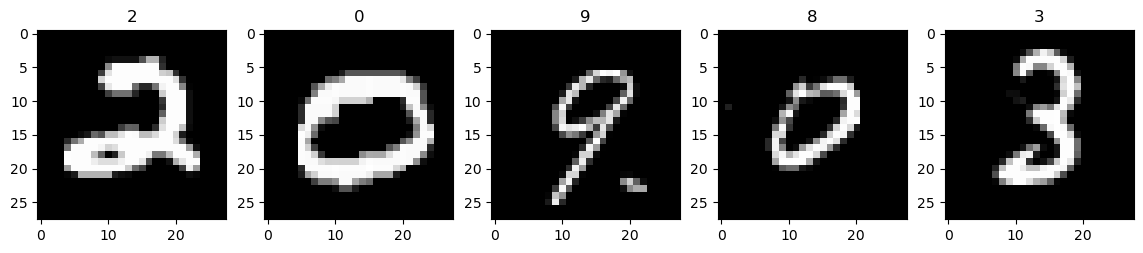

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [ ]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [ ]:
!head submit.csv

ImageId,Label
1,2
2,0
3,9
4,8
5,3
6,7
7,0
8,3
9,0


In [ ]:
# Your submission scored 0.966